In [1]:
from DataGenerator import DataGenerator
from Models import Models
from LoadData import LoadData
from BaselineHelperFunctions import BaselineHelperFunctions
from RandomGridSearch import RandomGridSearch
import json
from RandomGridSearch import RandomGridSearch 
import re

helper = BaselineHelperFunctions()

In [2]:

def read_results(text_file):
    dictionaries = []
    with open(text_file, 'r') as file:
        for idx, line in enumerate(file):
            line = re.sub("\'", "\"", line.rstrip())
            if idx % 6 != 0: 
                dictionaries.append(json.loads(line))
    dictionaries_by_model = []
    one_model = []
    for idx, dictionary in enumerate(dictionaries):
        if idx % 5 != 0 or idx == 0:
            one_model.append(dictionary)
        else:
            dictionaries_by_model.append(one_model)
            one_model = []
            one_model.append(dictionary)           
    return dictionaries_by_model

In [3]:
read_results('results_5.txt')

[[{'model_nr': 5, 'index': 0},
  {'batch_size': 128,
   'epochs': 2,
   'learning_rate': 0.0001,
   'optimizer': 'sgd'},
  {'activation': 'sigmoid',
   'dropout_rate': 0.3,
   'filters': 21,
   'kernel_size': 3,
   'l1_r': 0.2,
   'l2_r': 0.001,
   'padding': 'valid',
   'start_neurons': 4},
  {'test_loss': 1.3187990188598633,
   'test_accuracy': 0.3203125,
   'test_mse': 0.25261667370796204,
   'test_precision': 0.3188405930995941,
   'test_recall': 0.171875},
  {'train_loss': 1.2543152570724487,
   'train_accuracy': 0.3893229067325592,
   'train_mse': 0.23446671664714813,
   'train_precision': 0.4148681163787842,
   'train_recall': 0.2252604216337204}],
 [{'model_nr': 5, 'index': 1},
  {'batch_size': 256,
   'epochs': 2,
   'learning_rate': 0.001,
   'optimizer': 'adam'},
  {'activation': 'relu',
   'dropout_rate': 0.4,
   'filters': 1,
   'kernel_size': 3,
   'l1_r': 0.2,
   'l2_r': 0.1,
   'padding': 'valid',
   'start_neurons': 2},
  {'test_loss': 904.3223876953125,
   'test_accur

In [4]:
def get_hyperparams_from_dict(train_ds, val_ds, test_ds, dictionaries, index, train_channels = 3, timesteps = 6001, num_classes = 3, test = True, detrend = False):
    build_model_args = {"model_nr" : dictionaries[index][0]['model_nr'],
                        "input_shape" : (dictionaries[index][1]['batch_size'], channels, timesteps),
                        "num_classes" : num_classes,
                        "dropout_rate" : dictionaries[index][2]['dropout_rate'],
                        "activation" : dictionaries[index][2]['activation'],
                        "l2_r" : dictionaries[index][2]['l2_r'],
                        "full_regularizer" : True,
                        "start_neurons" : dictionaries[index][2]['start_neurons'],
                        "filters" : dictionaries[index][2]['filters'],
                        "kernel_size" : dictionaries[index][2]['kernel_size'],
                        "padding" : dictionaries[index][2]['padding']}
    model = Models(**build_model_args).model
    
    model_compile_args = {"loss" : "categorical_crossentropy",
                          "optimizer" : dictionaries[index][1]['optimizer'],
                          "metrics" : ["accuracy","MSE",
                                       tf.keras.metrics.Precision(thresholds=None, top_k=None, class_id=None, name=None, dtype=None),
                                       tf.keras.metrics.Recall(thresholds=None, top_k=None, class_id=None, name=None, dtype=None)]}
    
    gen_args = {"batch_size" : dictionaries[index][1]['batch_size'],
                    "shuffle" : True,
                    "test" : test,
                    "detrend" : detrend,
                    "num_classes" : num_classes}
    train_gen = data_gen.data_generator(train_ds, **gen_args)
    val_gen = data_gen.data_generator(val_ds, **gen_args)
    test_gen = data_gen.data_generator(test_ds, **gen_args)
    
    fit_args = {"steps_per_epoch" : self.helper.get_steps_per_epoch(self.train_ds, batch_size, test),
                        "epochs" : dictionaries[index][1]['epochs'],
                        "validation_data" : val_gen,
                        "validation_steps" : self.helper.get_steps_per_epoch(self.val_ds, batch_size, test),
                        "verbose" : 1,
                        "use_multiprocessing" : False, 
                        "workers" : 1,
                        "callbacks" : [PlotLossesKeras()] 
                       }
    

In [5]:
csv_root = 'csv_folder_3_class'
full_data_csv, train_csv, val_csv, test_csv = LoadData(csv_root, isBalanced = True).getData()
data_gen = DataGenerator(csv_root, train_csv, val_csv, test_csv)
full_ds = data_gen.load_dataset(full_data_csv)
train_ds = data_gen.load_dataset(train_csv)
val_ds = data_gen.load_dataset(val_csv)
test_ds = data_gen.load_dataset(test_csv)

In [6]:
randomGridSearch = RandomGridSearch(train_ds, val_ds, test_ds, 5, True,False, 1)

In [7]:
dictionaries = randomGridSearch.read_results()

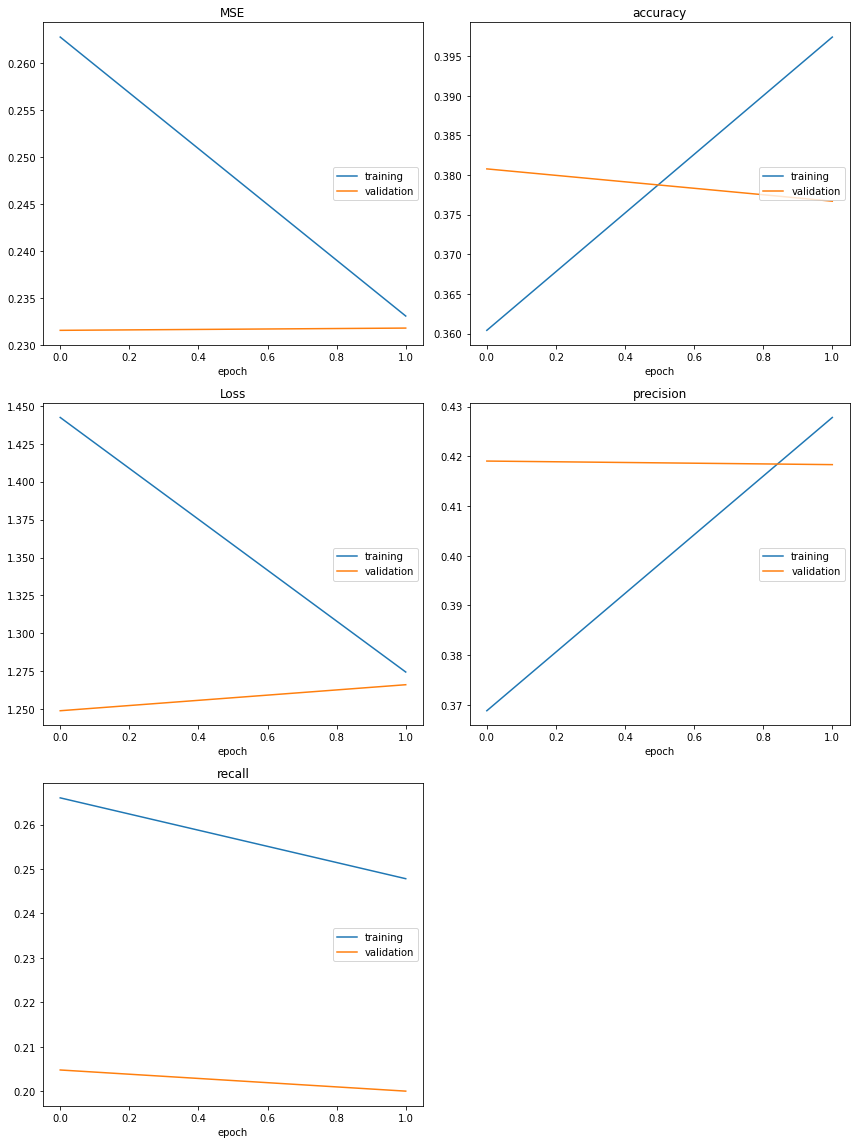

MSE
	training         	 (min:    0.233, max:    0.263, cur:    0.233)
	validation       	 (min:    0.232, max:    0.232, cur:    0.232)
accuracy
	training         	 (min:    0.360, max:    0.397, cur:    0.397)
	validation       	 (min:    0.377, max:    0.381, cur:    0.377)
Loss
	training         	 (min:    1.275, max:    1.442, cur:    1.275)
	validation       	 (min:    1.249, max:    1.266, cur:    1.266)
precision
	training         	 (min:    0.369, max:    0.428, cur:    0.428)
	validation       	 (min:    0.418, max:    0.419, cur:    0.418)
recall
	training         	 (min:    0.248, max:    0.266, cur:    0.248)
	validation       	 (min:    0.200, max:    0.205, cur:    0.200)
129/128 [==============================] - 25s 191ms/step - loss: 1.2745 - accuracy: 0.3974 - MSE: 0.2331 - precision: 0.4278 - recall: 0.2478 - val_loss: 1.2662 - val_accuracy: 0.3767 - val_MSE: 0.2318 - val_precision: 0.4183 - val_recall: 0.2001


In [8]:
model = randomGridSearch.fit_from_result(dictionaries, 0)

In [9]:
dictionaries = randomGridSearch.read_results()

**Highest test accuracy**

**Highest train accuracy**

**Highest precision**

**Highest recall**